In [ ]:
# Needed Libraries
%pip install numpy matplotlib scikit-learn torch

In [12]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load MNIST dataset
print("Loading MNIST dataset...")
mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False)
X = mnist["data"]  # Features (images)
y = mnist["target"].astype(np.uint8)  # Labels (digits 0-9)

# Normalize pixel values to [0, 1]
X = X / 255.0

# Split data into train and test sets (80% train, 20% test)
print("Splitting data into train and test sets...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print dataset details
print("Dataset loaded successfully!")
print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")
print(f"Sample labels: {y_train[:10]}")

Loading MNIST dataset...


C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Splitting data into train and test sets...
Dataset loaded successfully!
Training data shape: (56000, 784)
Test data shape: (14000, 784)
Sample labels: [5 4 8 0 2 6 5 4 8 3]


Visualizing sample images...


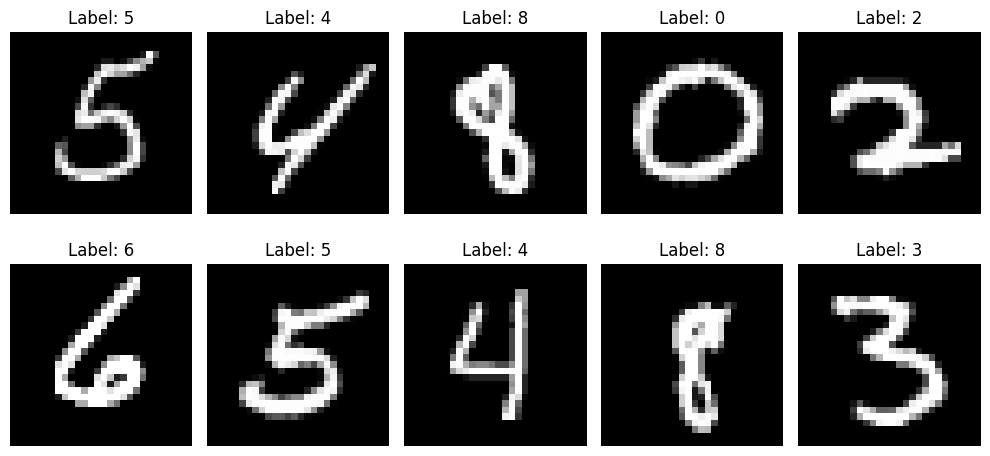

In [13]:
# Visualize sample images
def plot_sample_images(images, labels, n_rows=2, n_cols=5):
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 5))
    for i, ax in enumerate(axes.ravel()):
        ax.imshow(images[i].reshape(28, 28), cmap='gray')
        ax.set_title(f"Label: {labels[i]}")
        ax.axis('off')
    plt.tight_layout()
    plt.show()

print("Visualizing sample images...")
plot_sample_images(X_train, y_train)

In [14]:
# Reshape data for Logistic Regression (flatten images)
X_train_flat = X_train.reshape(X_train.shape[0], -1)  # Shape: (56000, 784)
X_test_flat = X_test.reshape(X_test.shape[0], -1)    # Shape: (14000, 784)

# Reshape data for CNN (keep images as 2D)
X_train_cnn = X_train.reshape(-1, 28, 28, 1)  # Shape: (56000, 28, 28, 1)
X_test_cnn = X_test.reshape(-1, 28, 28, 1)    # Shape: (14000, 28, 28, 1)

print("Reshaped data for Logistic Regression:")
print(f"X_train_flat shape: {X_train_flat.shape}")
print(f"X_test_flat shape: {X_test_flat.shape}")

print("\nReshaped data for CNN:")
print(f"X_train_cnn shape: {X_train_cnn.shape}")
print(f"X_test_cnn shape: {X_test_cnn.shape}")

Reshaped data for Logistic Regression:
X_train_flat shape: (56000, 784)
X_test_flat shape: (14000, 784)

Reshaped data for CNN:
X_train_cnn shape: (56000, 28, 28, 1)
X_test_cnn shape: (14000, 28, 28, 1)


In [15]:
from sklearn.model_selection import train_test_split

# Split training data into training and validation sets
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train_flat, y_train, test_size=0.2, random_state=42)

print("\nTraining and validation sets created:")
print(f"X_train_split shape: {X_train_split.shape}")
print(f"X_val shape: {X_val.shape}")


Training and validation sets created:
X_train_split shape: (44800, 784)
X_val shape: (11200, 784)


In [16]:
from sklearn.decomposition import PCA

# Apply PCA to reduce dimensionality
n_components = 100  # Number of principal components to keep
pca = PCA(n_components=n_components)

# Fit PCA on the training data and transform both training and test data
X_train_pca = pca.fit_transform(X_train_split)
X_val_pca = pca.transform(X_val)
X_test_pca = pca.transform(X_test_flat)

print("\nPCA applied:")
print(f"X_train_pca shape: {X_train_pca.shape}")
print(f"X_val_pca shape: {X_val_pca.shape}")
print(f"X_test_pca shape: {X_test_pca.shape}")


PCA applied:
X_train_pca shape: (44800, 100)
X_val_pca shape: (11200, 100)
X_test_pca shape: (14000, 100)


In [17]:
# Model 1 (Simple ML Model)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Initialize Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
print("Training Logistic Regression...")
log_reg.fit(X_train_pca, y_train_split)

# Evaluate on the validation set
y_val_pred = log_reg.predict(X_val_pca)

# Calculate evaluation metrics
accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred, average='macro')
recall = recall_score(y_val, y_val_pred, average='macro')
f1 = f1_score(y_val, y_val_pred, average='macro')

print("\nLogistic Regression Evaluation:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_val, y_val_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

Training Logistic Regression...

Logistic Regression Evaluation:
Accuracy: 0.9173
Precision: 0.9161
Recall: 0.9158
F1-Score: 0.9159

Confusion Matrix:
[[1088    0    2    5    3   12    6    0    9    1]
 [   0 1248    1    6    0    4    1    2   10    2]
 [   9    9  992   16    9    9   11   16   30    5]
 [   9    6   15 1032    1   36    4    8   18   15]
 [   3    4    7    1 1015    0   13    4    8   49]
 [  15    4   12   25   14  901   22    4   33    9]
 [  15    4   14    2    7   20 1027    0    7    0]
 [   3    6   16    4   13    2    1 1077    4   23]
 [   1   32   15   30    6   37    6    4  934   25]
 [   7    2    4   18   23    8    0   39   11  960]]


In [ ]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

# Define Lasso regression model with L1 regularization
lasso = Lasso(alpha=0.01)  # Adjust alpha for regularization strength

# Train the model
print("Training Lasso Regression Model...")
lasso.fit(X_train_flat, y_train)

# Predict on test data
y_pred = lasso.predict(X_test_flat)

# Convert predictions to integer labels (0-9)
y_pred_rounded = np.clip(np.round(y_pred), 0, 9).astype(int)

# Evaluate using RMSE
rmse = mean_squared_error(y_test, y_pred_rounded, squared=False)
print(f"Lasso Regression RMSE: {rmse:.4f}")


Training CNN...
Epoch 1, Validation Accuracy: 0.9847
Epoch 2, Validation Accuracy: 0.9894
Epoch 3, Validation Accuracy: 0.9940
Epoch 4, Validation Accuracy: 0.9959
Epoch 5, Validation Accuracy: 0.9969


In [19]:
from sklearn.metrics import accuracy_score

# Evaluate Logistic Regression on the test set
X_test_pca = pca.transform(X_test_flat)  # Apply PCA to test data
y_test_pred_logreg = log_reg.predict(X_test_pca)

# Calculate accuracy
accuracy_logreg = accuracy_score(y_test, y_test_pred_logreg)
print(f"Logistic Regression Test Set Accuracy: {accuracy_logreg:.4f}")

Logistic Regression Test Set Accuracy: 0.9166


In [20]:
# Evaluate CNN on the test set
X_test_cnn_tensor = torch.tensor(X_test_cnn, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

test_dataset = TensorDataset(X_test_cnn_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

cnn.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        outputs = cnn(images.permute(0, 3, 1, 2))
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy_cnn = correct / total
print(f"CNN Test Set Accuracy: {accuracy_cnn:.4f}")

CNN Test Set Accuracy: 0.9895


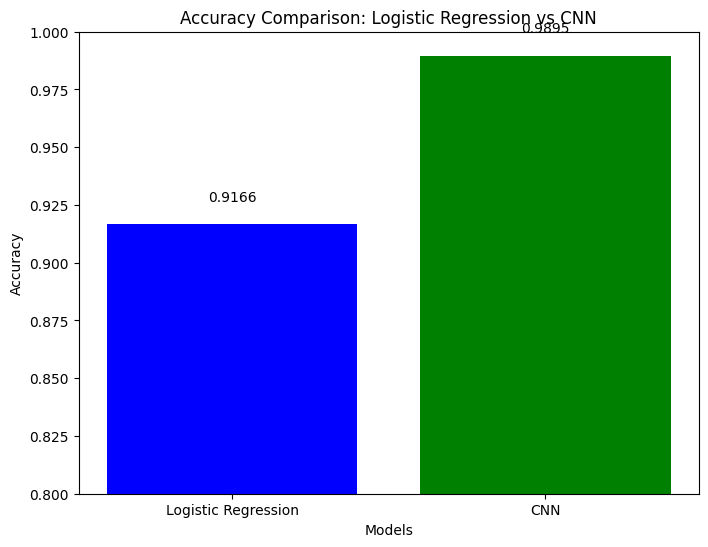

In [21]:
import matplotlib.pyplot as plt

# Data for the bar chart
models = ['Logistic Regression', 'CNN']
accuracies = [accuracy_logreg, accuracy_cnn]

# Plot the bar chart
plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['blue', 'green'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison: Logistic Regression vs CNN')
plt.ylim(0.8, 1.0)  # Set y-axis limits for better visualization
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.01, f"{acc:.4f}", ha='center')
plt.show()

<Figure size 1000x800 with 0 Axes>

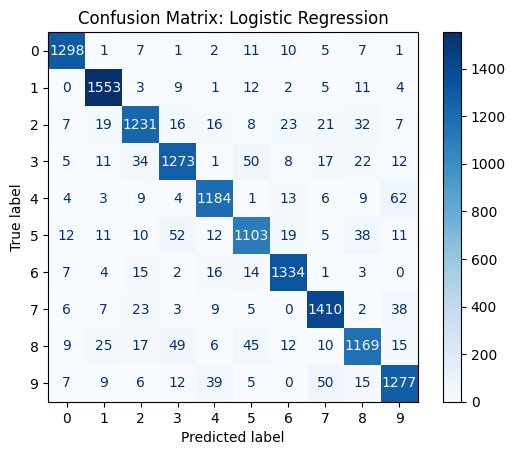

In [22]:
from sklearn.metrics import ConfusionMatrixDisplay

# Plot confusion matrix for Logistic Regression
plt.figure(figsize=(10, 8))
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred_logreg, cmap='Blues')
plt.title('Confusion Matrix: Logistic Regression')
plt.show()

<Figure size 1000x800 with 0 Axes>

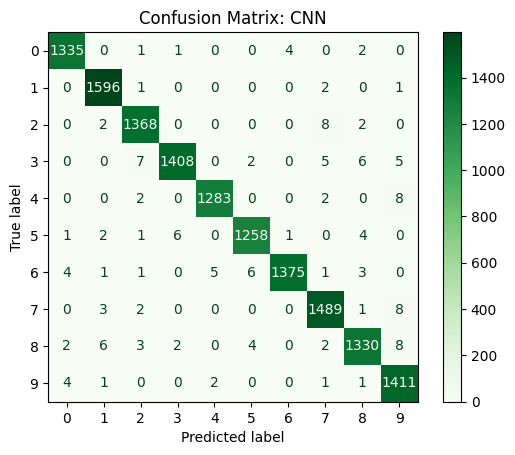

In [23]:
# Generate predictions for the CNN
y_test_pred_cnn = []
with torch.no_grad():
    for images, _ in test_loader:
        outputs = cnn(images.permute(0, 3, 1, 2))
        _, predicted = torch.max(outputs.data, 1)
        y_test_pred_cnn.extend(predicted.cpu().numpy())

# Plot confusion matrix for CNN
plt.figure(figsize=(10, 8))
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred_cnn, cmap='Greens')
plt.title('Confusion Matrix: CNN')
plt.show()